# Experiment 5: Extreme oscillatory parameters

## Imports

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.training import MetricsHistory

job_folder = "../../../results/experiment_5"

## Sorted bar chart

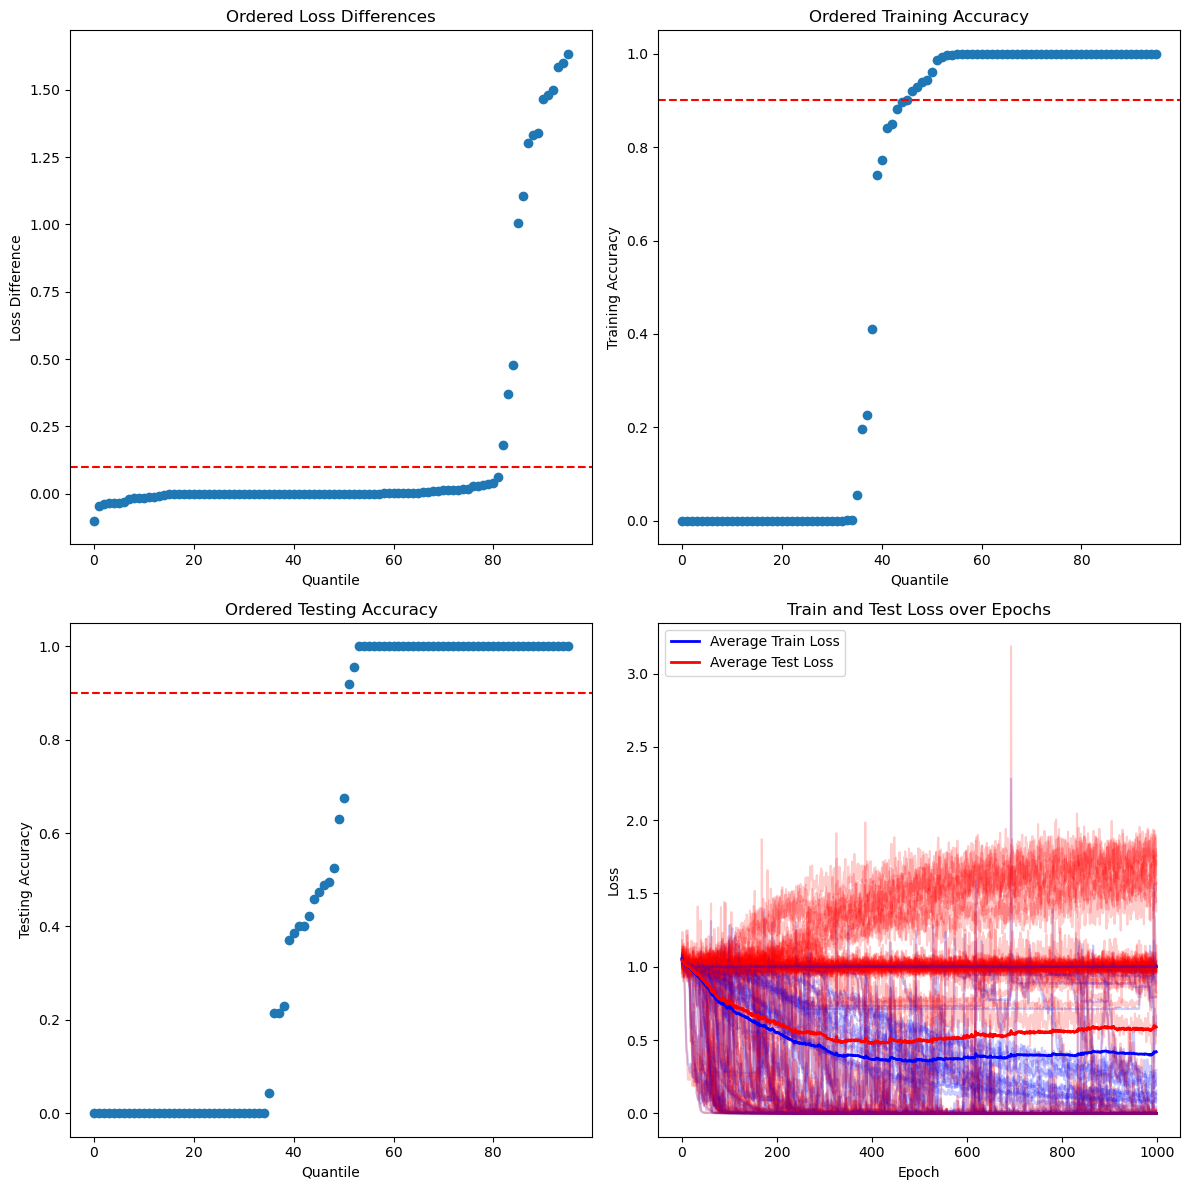

In [2]:
# Initialize lists to store metrics
loss_differences = []
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

for task_id in range(96):
    task_folder = os.path.join(job_folder, f"task_{task_id}")

    # Load the task metrics from CSV
    csv_path = os.path.join(task_folder, "metrics_history.csv")
    metrics_history = MetricsHistory([
        'train_loss', 'train_accuracy',
        'test_loss', 'test_accuracy',
        'grok_loss', 'grok_accuracy',
        'corrupt_loss', 'corrupt_accuracy',
    ])
    metrics_history.load_from_csv(csv_path)
    
    # Extract metrics and append to lists
    loss_differences.append(metrics_history.history['test_loss'][-1] - metrics_history.history['train_loss'][-1])
    train_accuracies.append(metrics_history.history['train_accuracy'][-1])
    test_accuracies.append(metrics_history.history['test_accuracy'][-1])
    train_losses.append(metrics_history.history['train_loss'])
    test_losses.append(metrics_history.history['test_loss'])

# Create 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 1st subplot: Loss differences
axes[0, 0].scatter(range(len(loss_differences)), sorted(loss_differences))
axes[0, 0].axhline(y=0.10, color='r', linestyle='--')
axes[0, 0].set_title("Ordered Loss Differences")
axes[0, 0].set_xlabel("Quantile")
axes[0, 0].set_ylabel("Loss Difference")

# 2nd subplot: Training accuracies
axes[0, 1].scatter(range(len(train_accuracies)), sorted(train_accuracies))
axes[0, 1].axhline(y=0.90, color='r', linestyle='--')
axes[0, 1].set_title("Ordered Training Accuracy")
axes[0, 1].set_xlabel("Quantile")
axes[0, 1].set_ylabel("Training Accuracy")

# 3rd subplot: Testing accuracies
axes[1, 0].scatter(range(len(test_accuracies)), sorted(test_accuracies))
axes[1, 0].axhline(y=0.90, color='r', linestyle='--')
axes[1, 0].set_title("Ordered Testing Accuracy")
axes[1, 0].set_xlabel("Quantile")
axes[1, 0].set_ylabel("Testing Accuracy")

# 4th subplot: Train and Test losses over epochs
for train, test in zip(train_losses, test_losses):
    axes[1, 1].plot(train, color='blue', alpha=0.2)
    axes[1, 1].plot(test, color='red', alpha=0.2)

# Plot the average losses
axes[1, 1].plot(np.mean(train_losses, axis=0), color='blue', linewidth=2, label='Average Train Loss')
axes[1, 1].plot(np.mean(test_losses, axis=0), color='red', linewidth=2, label='Average Test Loss')
axes[1, 1].set_title("Train and Test Loss over Epochs")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("Loss")
axes[1, 1].legend()

plt.tight_layout()
plt.show()